In [1]:
import os
import time as timer
import numpy as np
import pickle

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets
import torchvision.transforms as T

## My own modules
import viz_utils as vu
###

import imp
imp.reload(vu)

/var/folders/wb/ttr9x7pn27q1_rp5vtjfr0s00000gn/T/ipykernel_40417/2133000855.py:18: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'viz_utils' from '/Users/mghifary/Work/govtech/codes/AI/deeplearning/viz_utils.py'>

### Constants

In [2]:
DATA_DIR = "../data"
MODEL_DIR = "../models"

In [3]:
# Load dataset
training_data = datasets.FashionMNIST(
    root=DATA_DIR, 
    train=True, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

test_data = datasets.FashionMNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

In [4]:
X = training_data.data
Xt = test_data.data

[n, dx1, dx2] = X.shape

In [5]:
Xn = torch.reshape(X, (-1, dx1*dx2)).float()
Xn_t = torch.reshape(Xt, (-1, dx1*dx2)).float()

img_np : 0.0 1.0


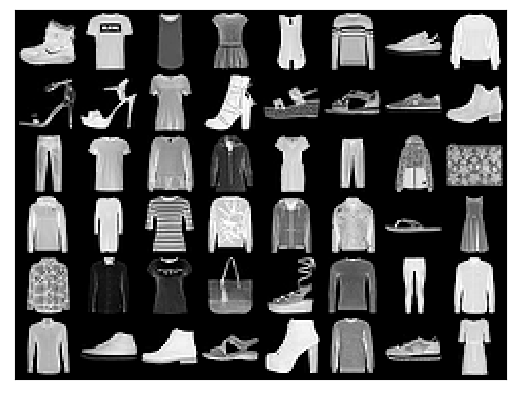

In [6]:
V = torch.reshape(Xn, (-1, dx1, dx2))
grid = vu.set_grid(V, num_cells=48)
vu.show(grid)

#### 1. Covariance of X

In [7]:
S = torch.cov(Xn.T)

In [8]:
S.shape

torch.Size([784, 784])

#### 2. Compute Singular Value Decomposition of S

In [9]:
[U, D, V] = torch.linalg.svd(S)

In [10]:
k = 100

In [11]:
W = U[:, :k] # eigenvectors

In [12]:
W.shape 

torch.Size([784, 100])

img_np : 0.0 1.0


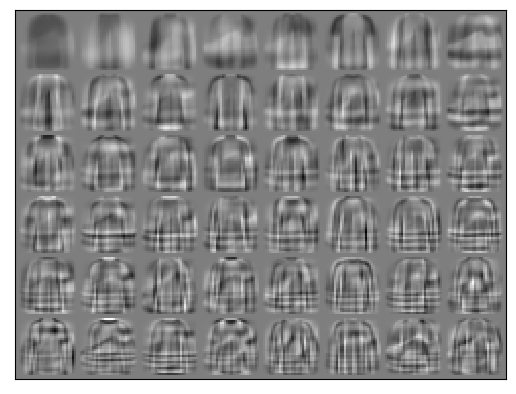

In [13]:
V = torch.reshape(W.T, (-1, dx1, dx2))
grid = vu.set_grid(V, num_cells=48)
vu.show(grid)

#### 3. Reduce dimension

In [14]:
Z = torch.matmul(Xn, W)
Zt = torch.matmul(Xn_t, W)

#### 4. Reconstruct the data

In [15]:
Xr = torch.matmul(Z, W.T)
Xr_t = torch.matmul(Zt, W.T)

img_np : 0.0 1.0


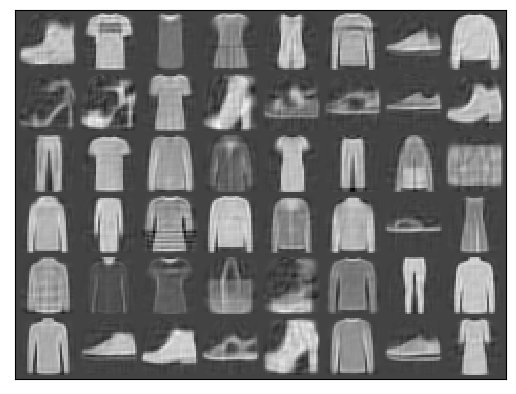

In [16]:
V = torch.reshape(Xr, (-1, dx1, dx2))
grid = vu.set_grid(V, num_cells=48)
vu.show(grid)

img_np : 0.0 1.0


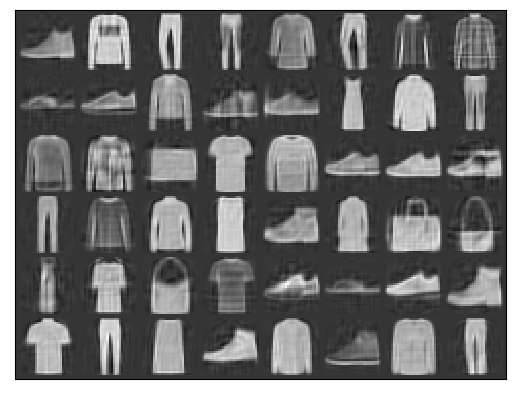

In [17]:
V = torch.reshape(Xr_t, (-1, dx1, dx2))
grid = vu.set_grid(V, num_cells=48)
vu.show(grid)

In [18]:
PoV = torch.sum(D[:k]) / torch.sum(D)
print(PoV)

tensor(0.9124)
